In [1]:
import numpy as np 
import pandas as pd 
import os
import plotly.express as px
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

In [3]:
test_df.shape

(250000, 11)

In [4]:
train_df = train_df.drop(columns=['Guest_Popularity_percentage'])
test_df = test_df.drop(columns=['Guest_Popularity_percentage'])

In [5]:
train_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [6]:
input_cols = ['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment']
target_cols = 'Listening_Time_minutes'

In [7]:
numerical_cols = train_df[input_cols].select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = train_df[input_cols].select_dtypes('object').columns.tolist()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Episode_Length_minutes', ylabel='Count'>

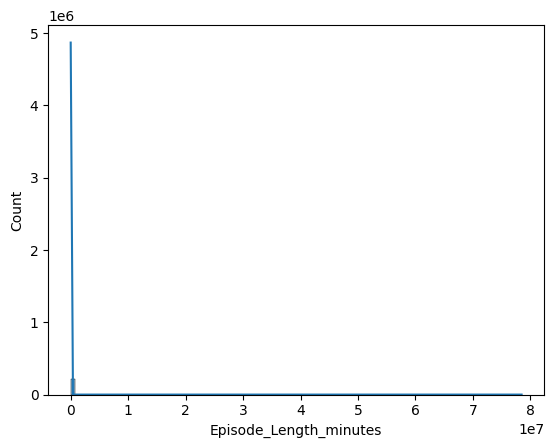

In [8]:
sns.histplot(test_df['Episode_Length_minutes'].dropna(), bins=100, kde=True)

In [9]:
upper = test_df['Episode_Length_minutes'].quantile(0.99)

In [10]:
test_df['Episode_Length_minutes'] = test_df['Episode_Length_minutes'].clip(upper=upper)
print("Clipped Skewness:", test_df['Episode_Length_minutes'].skew())

Clipped Skewness: -0.0052217270817439525


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [11]:
test_df['Episode_Length_minutes'].describe()

count    221264.000000
mean         64.542858
std          32.945031
min           2.470000
25%          35.780000
50%          63.970000
75%          94.150000
max         119.010000
Name: Episode_Length_minutes, dtype: float64

In [12]:
test_df['Episode_Length_minutes'].nlargest(5000)

87        119.01
176       119.01
529       119.01
562       119.01
625       119.01
           ...  
191670    117.60
195880    117.60
201417    117.60
207509    117.60
216522    117.60
Name: Episode_Length_minutes, Length: 5000, dtype: float64

<Axes: >

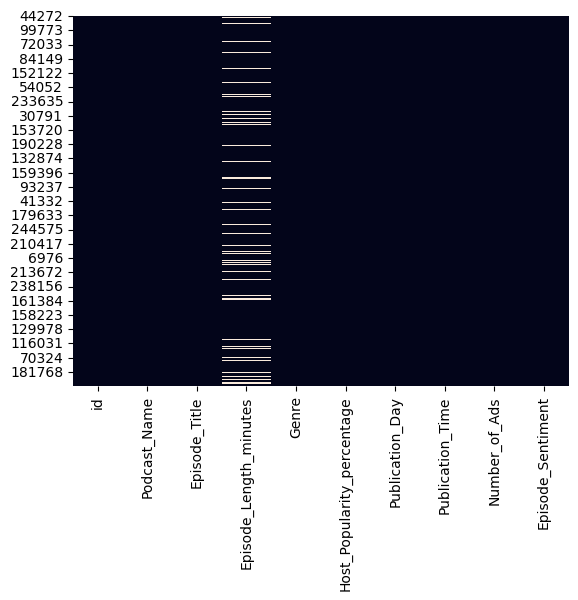

In [13]:
sns.heatmap(test_df.sample(2000).isnull(), cbar=False)

In [14]:
test_df.isnull().mean()

id                            0.000000
Podcast_Name                  0.000000
Episode_Title                 0.000000
Episode_Length_minutes        0.114944
Genre                         0.000000
Host_Popularity_percentage    0.000000
Publication_Day               0.000000
Publication_Time              0.000000
Number_of_Ads                 0.000000
Episode_Sentiment             0.000000
dtype: float64

In [15]:
test_df[numerical_cols].skew()

id                           -8.717749e-17
Episode_Length_minutes       -5.221727e-03
Host_Popularity_percentage    1.174955e-02
Number_of_Ads                 4.488675e+02
dtype: float64

In [16]:
test_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']].skew()

Episode_Length_minutes         -0.005222
Host_Popularity_percentage      0.011750
Number_of_Ads                 448.867463
dtype: float64

In [17]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,2.0,Neutral


In [18]:
upper = test_df['Number_of_Ads'].quantile(0.99)
upper

3.0

In [19]:
test_df['Number_of_Ads'] = test_df['Number_of_Ads'].clip(upper=upper)

In [20]:
test_df['Number_of_Ads'].nlargest(5)

14    3.0
15    3.0
26    3.0
28    3.0
40    3.0
Name: Number_of_Ads, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Ads', ylabel='Count'>

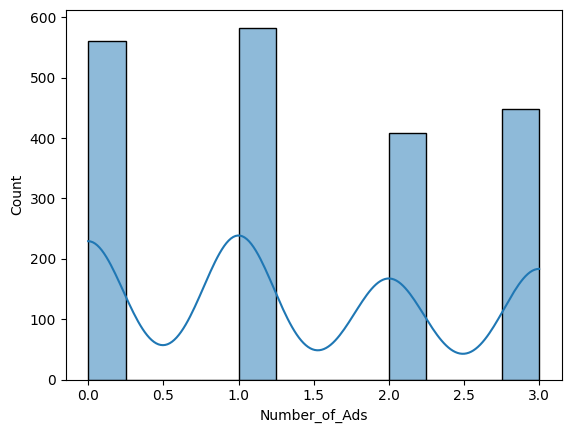

In [21]:
sns.histplot(test_df['Number_of_Ads'].sample(2000), kde=True)

In [22]:
px.histogram(test_df.sample(2000), x='Number_of_Ads')

In [23]:
train_df['Number_of_Ads'].skew()

6.032991762852518

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          750000 non-null  int64  
 1   Podcast_Name                750000 non-null  object 
 2   Episode_Title               750000 non-null  object 
 3   Episode_Length_minutes      662907 non-null  float64
 4   Genre                       750000 non-null  object 
 5   Host_Popularity_percentage  750000 non-null  float64
 6   Publication_Day             750000 non-null  object 
 7   Publication_Time            750000 non-null  object 
 8   Number_of_Ads               749999 non-null  float64
 9   Episode_Sentiment           750000 non-null  object 
 10  Listening_Time_minutes      750000 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 62.9+ MB


In [25]:
train_df['Listening_Time_minutes'].nlargest(10)

3347      119.97
16285     119.97
18423     119.97
46709     119.97
73010     119.97
112084    119.97
147960    119.97
163462    119.97
163853    119.97
200116    119.97
Name: Listening_Time_minutes, dtype: float64

In [26]:
upper = train_df['Number_of_Ads'].quantile(0.99)
upper

3.0

In [27]:
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].clip(upper=upper)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning:

invalid value encountered in less_equal



In [28]:
train_df['Number_of_Ads'].nlargest(50)

4      3.0
5      3.0
9      3.0
10     3.0
18     3.0
34     3.0
42     3.0
53     3.0
63     3.0
68     3.0
69     3.0
70     3.0
71     3.0
77     3.0
78     3.0
83     3.0
87     3.0
94     3.0
100    3.0
122    3.0
125    3.0
128    3.0
131    3.0
133    3.0
134    3.0
149    3.0
151    3.0
152    3.0
164    3.0
171    3.0
176    3.0
184    3.0
201    3.0
203    3.0
205    3.0
215    3.0
217    3.0
226    3.0
244    3.0
249    3.0
255    3.0
262    3.0
265    3.0
267    3.0
268    3.0
275    3.0
276    3.0
277    3.0
278    3.0
280    3.0
Name: Number_of_Ads, dtype: float64

In [29]:
test_df.isna().sum()

id                                0
Podcast_Name                      0
Episode_Title                     0
Episode_Length_minutes        28736
Genre                             0
Host_Popularity_percentage        0
Publication_Day                   0
Publication_Time                  0
Number_of_Ads                     0
Episode_Sentiment                 0
dtype: int64

In [30]:
test_df[numerical_cols].skew()

id                           -8.717749e-17
Episode_Length_minutes       -5.221727e-03
Host_Popularity_percentage    1.174955e-02
Number_of_Ads                 2.184969e-01
dtype: float64

In [31]:
train_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads','Listening_Time_minutes']].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.023596,-0.058373,0.916749
Host_Popularity_percentage,0.023596,1.000000,-0.017862,0.050870
Number_of_Ads,-0.058373,-0.017862,1.000000,-0.124166
Listening_Time_minutes,0.916749,0.050870,-0.124166,1.000000


In [32]:
from sklearn.impute import KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors=5)
train_df['Episode_Length_minutes'] = imputer.fit_transform(train_df[['Episode_Length_minutes']])

In [34]:
train_df['Episode_Length_minutes'].nlargest(5)

101637    325.24
598106    120.93
552181    120.73
74270     120.64
168115    120.64
Name: Episode_Length_minutes, dtype: float64

In [35]:
train_df['Episode_Length_minutes'] = train_df['Episode_Length_minutes'].apply(
    lambda x: np.random.uniform(0, 120) if np.isnan(x) else x
)

In [36]:
test_df['Episode_Length_minutes'] = test_df['Episode_Length_minutes'].apply(
    lambda x: np.random.uniform(0, 120) if np.isnan(x) else x
)

In [37]:
test_df.isna().sum()

id                            0
Podcast_Name                  0
Episode_Title                 0
Episode_Length_minutes        0
Genre                         0
Host_Popularity_percentage    0
Publication_Day               0
Publication_Time              0
Number_of_Ads                 0
Episode_Sentiment             0
dtype: int64

In [38]:
train_df.isna().sum()

id                            0
Podcast_Name                  0
Episode_Title                 0
Episode_Length_minutes        0
Genre                         0
Host_Popularity_percentage    0
Publication_Day               0
Publication_Time              0
Number_of_Ads                 1
Episode_Sentiment             0
Listening_Time_minutes        0
dtype: int64

In [39]:
train_df = train_df.dropna(subset=['Number_of_Ads'])

In [40]:
numerical_cols

['id', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']

In [41]:
cat_cols

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
train_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']] = scaler.fit_transform(train_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']])

In [44]:
train_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']].head()

,Episode_Length_minutes,Host_Popularity_percentage,Number_of_Ads
0,-0.000001,0.653610,-1.213263
1,1.783933,0.309974,0.586958
2,0.303108,0.442007,-1.213263
3,0.085985,-0.115417,0.586958
4,1.484219,0.883574,1.487068


In [45]:
test_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']] = scaler.fit_transform(test_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']])

In [46]:
test_df[['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']].head()

,Episode_Length_minutes,Host_Popularity_percentage,Number_of_Ads
0,0.449872,-0.944340,-0.312103
1,-1.089279,0.505836,-1.210839
2,0.152827,0.357234,-1.210839
3,1.547371,-1.587260,0.586634
4,0.249833,-0.070651,0.586634


In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
cat_cols

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [49]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [50]:
encoder.fit(train_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [51]:
encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_cols

array(["Podcast_Name_Athlete's Arena", 'Podcast_Name_Brain Boost',
       'Podcast_Name_Business Briefs', 'Podcast_Name_Business Insights',
       'Podcast_Name_Comedy Corner', 'Podcast_Name_Crime Chronicles',
       'Podcast_Name_Criminal Minds', 'Podcast_Name_Current Affairs',
       'Podcast_Name_Daily Digest', 'Podcast_Name_Detective Diaries',
       'Podcast_Name_Digital Digest', 'Podcast_Name_Educational Nuggets',
       'Podcast_Name_Fashion Forward', 'Podcast_Name_Finance Focus',
       'Podcast_Name_Fitness First', 'Podcast_Name_Funny Folks',
       'Podcast_Name_Gadget Geek', 'Podcast_Name_Game Day',
       'Podcast_Name_Global News', 'Podcast_Name_Health Hour',
       'Podcast_Name_Healthy Living', 'Podcast_Name_Home & Living',
       'Podcast_Name_Humor Hub', 'Podcast_Name_Innovators',
       'Podcast_Name_Joke Junction', 'Podcast_Name_Laugh Line',
       'Podcast_Name_Learning Lab', 'Podcast_Name_Life Lessons',
       'Podcast_Name_Lifestyle Lounge', 'Podcast_Name_Market M

In [52]:
train_df[encoded_cols] = encoder.transform(train_df[cat_cols])

/tmp/ipykernel_13/227183327.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/227183327.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/227183327.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/227183327.py:1: PerformanceWarning:

DataFr

In [53]:
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

/tmp/ipykernel_13/2389210805.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/2389210805.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/2389210805.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_13/2389210805.py:1: PerformanceWarning:

Da

In [54]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Number_of_Ads,Episode_Sentiment,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0,Mystery Matters,Episode 98,-0.000001,True Crime,0.653610,Thursday,Night,-1.213263,Positive,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,Joke Junction,Episode 26,1.783933,Comedy,0.309974,Saturday,Afternoon,0.586958,Negative,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,Study Sessions,Episode 16,0.303108,Education,0.442007,Tuesday,Evening,-1.213263,Negative,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,Digital Digest,Episode 45,0.085985,Technology,-0.115417,Monday,Morning,0.586958,Positive,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,Mind & Body,Episode 86,1.484219,Health,0.883574,Monday,Afternoon,1.487068,Neutral,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Columns: 183 entries, id to Episode_Sentiment_Positive
dtypes: float64(176), int64(1), object(6)
memory usage: 1.0+ GB


In [56]:
train_df['Episode_Title'].describe()

count         749999
unique           100
top       Episode 71
freq           10515
Name: Episode_Title, dtype: object

In [57]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Number_of_Ads,Episode_Sentiment,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,750000,Educational Nuggets,Episode 73,0.449872,Education,-0.944340,Saturday,Evening,-0.312103,Neutral,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,750001,Sound Waves,Episode 23,-1.089279,Music,0.505836,Sunday,Morning,-1.210839,Neutral,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,750002,Joke Junction,Episode 11,0.152827,Comedy,0.357234,Friday,Evening,-1.210839,Positive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,750003,Comedy Corner,Episode 73,1.547371,Comedy,-1.587260,Sunday,Morning,0.586634,Positive,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,750004,Life Lessons,Episode 50,0.249833,Lifestyle,-0.070651,Wednesday,Morning,0.586634,Neutral,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 182 entries, id to Episode_Sentiment_Positive
dtypes: float64(175), int64(1), object(6)
memory usage: 347.1+ MB


In [59]:
from sklearn.linear_model import SGDRegressor

In [60]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

In [61]:
numerical_cols

['id', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']

In [62]:
numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']

In [63]:
target_cols

'Listening_Time_minutes'

In [64]:
cols = train_df.columns[1:-1].tolist()

In [65]:
import itertools

In [66]:
cols = list(itertools.chain(numeric_cols, encoded_cols))
cols

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Number_of_Ads',
 "Podcast_Name_Athlete's Arena",
 'Podcast_Name_Brain Boost',
 'Podcast_Name_Business Briefs',
 'Podcast_Name_Business Insights',
 'Podcast_Name_Comedy Corner',
 'Podcast_Name_Crime Chronicles',
 'Podcast_Name_Criminal Minds',
 'Podcast_Name_Current Affairs',
 'Podcast_Name_Daily Digest',
 'Podcast_Name_Detective Diaries',
 'Podcast_Name_Digital Digest',
 'Podcast_Name_Educational Nuggets',
 'Podcast_Name_Fashion Forward',
 'Podcast_Name_Finance Focus',
 'Podcast_Name_Fitness First',
 'Podcast_Name_Funny Folks',
 'Podcast_Name_Gadget Geek',
 'Podcast_Name_Game Day',
 'Podcast_Name_Global News',
 'Podcast_Name_Health Hour',
 'Podcast_Name_Healthy Living',
 'Podcast_Name_Home & Living',
 'Podcast_Name_Humor Hub',
 'Podcast_Name_Innovators',
 'Podcast_Name_Joke Junction',
 'Podcast_Name_Laugh Line',
 'Podcast_Name_Learning Lab',
 'Podcast_Name_Life Lessons',
 'Podcast_Name_Lifestyle Lounge',
 'Podcast_Name_Market 

In [67]:
sgd.fit(train_df[cols], train_df[target_cols])

SGDRegressor(penalty=None, random_state=42)

In [68]:
train_predict = sgd.predict(train_df[cols])

In [69]:
def rmse(target, predict):
    return np.sqrt(np.mean(np.square(target-predict)))

In [70]:
print(rmse(train_df[target_cols], train_predict))

13.354103623798752


In [71]:
test_predict = sgd.predict(test_df[cols])

In [72]:
test_df['id']

0         750000
1         750001
2         750002
3         750003
4         750004
           ...  
249995    999995
249996    999996
249997    999997
249998    999998
249999    999999
Name: id, Length: 250000, dtype: int64

In [73]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'Listening_Time_minutes': test_predict
})
submission.to_csv('/kaggle/working/submission01.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
